Decision Tree Accuracy: 0.7132867132867133


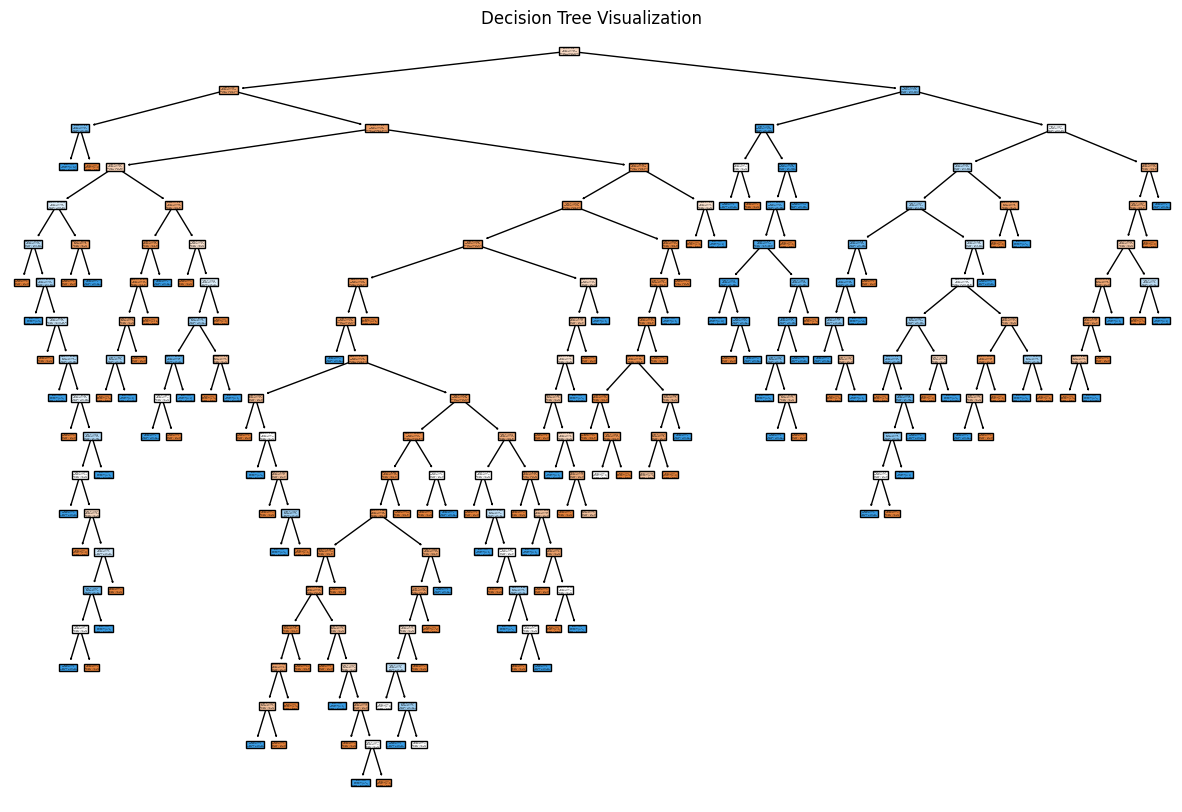

In [2]:
# 📌 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt  # ✅ Added missing import
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# ✅ Load dataset
df = pd.read_csv("C:/Users/vigne/Downloads/archive (3)/Titanic-Dataset.csv")

# ✅ Basic preprocessing
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
df.dropna(inplace=True)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# ✅ Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# ✅ Evaluate model
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# ✅ Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


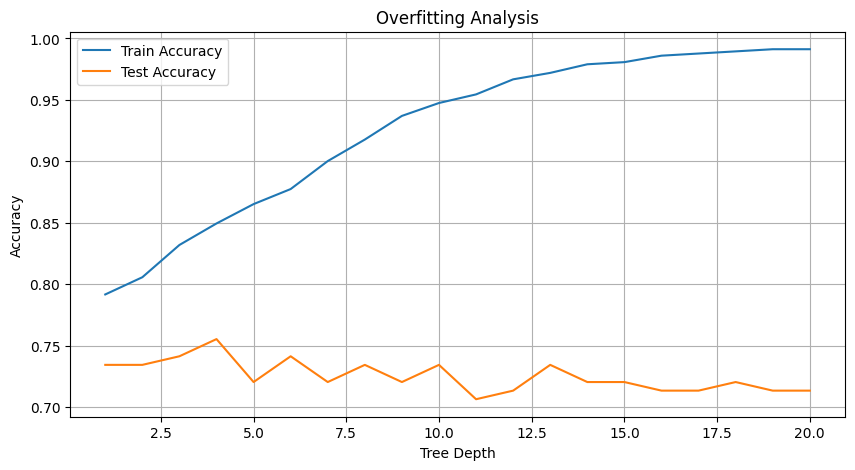

In [3]:
# 📌 Module 2: Analyze Overfitting and Control Tree Depth
train_accuracies = []
test_accuracies = []

for depth in range(1, 21):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_accuracies.append(tree.score(X_train, y_train))
    test_accuracies.append(tree.score(X_test, y_test))

# Plot accuracy vs. tree depth
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_accuracies, label="Train Accuracy")
plt.plot(range(1, 21), test_accuracies, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# 📌 Module 3: Train a Random Forest and Compare Accuracy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7832167832167832


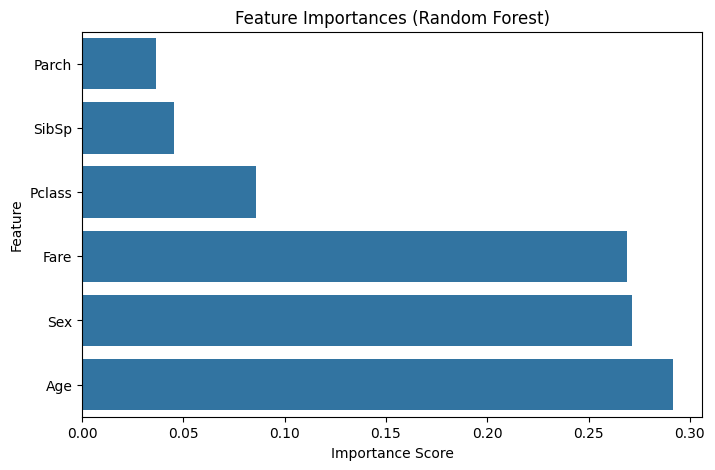

In [5]:
# 📌 Module 4: Interpret Feature Importances
import seaborn as sns

# Feature importance
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=features, y=features.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [6]:
# 📌 Module 5: Evaluate using Cross-Validation
from sklearn.model_selection import cross_val_score

# Cross-validation on Random Forest
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation Scores: [0.73426573 0.84615385 0.83216783 0.75524476 0.85915493]
Mean CV Accuracy: 0.8053974194819264
